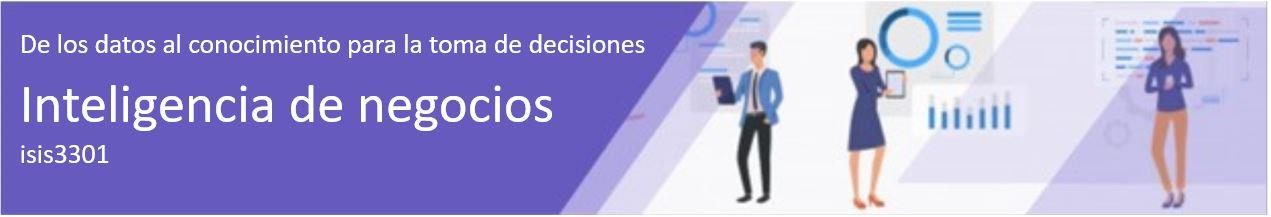

# Laboratorio 1 - Regresión

- ### Estudiante 1: 
- ### Estudiante 2:
- ### Estudiante 3:
-Este notebook presenta el desarrollo de un flujo completo de modelado predictivo orientado a estimar el valor de mercado de jugadores de fútbol a partir de sus estadísticas de rendimiento. Para ello, se sigue la metodología ASUM-DM, abordando de manera estructurada cada una de sus etapas: en primer lugar, se realiza el entendimiento y perfilamiento de los datos, identificando su calidad y las variables más relevantes; posteriormente, se lleva a cabo la preparación y preprocesamiento, resolviendo problemas de consistencia y transformando los datos para el modelado. A continuación, se construye un modelo de regresión lineal, evaluado mediante métricas cuantitativas y validaciones estadísticas, además de una interpretación cualitativa de sus coeficientes. Finalmente, se presentan los resultados de forma clara y se exporta el mejor modelo en un pipeline, junto con las predicciones generadas sobre los datos de prueba, garantizando su reutilización en un entorno de producción.ión.


Este notebook se encuentra dividido en las siguientes secciones:

1. Carga de los datos
2. Entendimiento y limpieza de datos
3. Preparación de datos
4. Modelado
5. Evaluación cuantitativa
6. Evaluación cualitativa
7. Exportar modelo
8. Generar predicciones

## 1. Carga de los datos

En esta etapa se importan las librerías necesarias, se cargan los datos, y se hace una manipulación básica de los datos 

In [60]:
# Librerias generales

# Pandas
import pandas as pd
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar

# Numpy
import numpy as np

# Persistencia modelo
from joblib import dump, load

# Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# scipy
import scipy.stats as stats

In [61]:
# Ubicación de la base de datos
db_location = 'datos_entrenamiento_laboratorio1(train_data).csv'

In [62]:
# Cargar los datos
df_bicis=pd.read_csv(db_location, sep=',', encoding = "ISO-8859-1")

In [63]:
# Dimensiones de los datos
df_bicis.shape

(57934, 50)

In [64]:
# Ver los datos
display(df_bicis.sample(5)) # Muestra

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
38620,Matthis Abline,fr FRA,FW,21-171,"Sunday September 15, 2024",0,6,0.5,0.5,0.6,0.6,3,15,15,15,2,2,0,0,7,1,0.6,0.6,0.4,1,14,1,0,0,13,13,13,0,1,0,18,7,0.0,2,0,3,0,24,7,0,0,2,66.7,â¬18.00m,30.06.2028
17181,Luis Rioja,es ESP,"RM,LM",31-052,"Saturday December 7, 2024",0,0,0.0,0.0,0.7,0.7,5,46,46,46,4,4,3,3,7,5,0.7,0.7,0.6,4,40,5,1,13,28,28,28,1,0,0,32,2,50.0,2,0,2,5,38,11,0,13,0,0.0,â¬2.00m,30.06.2026
54394,Djibril Sidibe,fr FRA,CB,32-221,"Friday March 7, 2025",0,0,0.0,0.0,0.1,0.1,1,60,60,60,3,3,1,1,20,0,0.1,0.1,0.2,2,44,16,0,2,44,44,44,0,5,0,16,0,50.0,1,1,2,0,40,2,1,2,1,100.0,â¬1.00m,30.06.2026
2638,Ederson,br BRA,GK,31-070,"Saturday October 26, 2024",0,0,0.0,0.0,0.0,0.0,0,23,23,23,0,0,0,0,12,5,0.0,0.0,0.0,0,19,4,0,0,20,20,20,0,0,0,0,0,NaN,0,0,0,0,17,0,0,0,0,NaN,â¬50.00m,30.06.2027
42148,Zinedine Ferhat,dz ALG,RW,31-310,"Sunday January 5, 2025",0,0,0.0,0.0,0.0,0.0,0,10,10,10,3,3,0,0,1,1,0.0,0.0,0.0,0,10,0,0,2,7,7,7,0,0,0,7,0,NaN,0,0,1,1,12,4,1,2,3,75.0,NaN,NaN


In [72]:
# Imprimimos los diferentes tipos de las columnas
df_bicis.dtypes

Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
xAG.1                             float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_intentados.1                  int64
Pases_intentados.2                  int64
Pases_progresivos                   int64
Pases_progresivos.1                 int64
Regates_exitosos                    int64
Regates_exitosos.1                  int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xAG.2                             float64
xAG.3                             float64
xA                                

## 2. Entendimiento de los datos

En esta etapa se realizan los pasos de perfilamiento y análisis de calidad de datos para determinar si es posible o no abordar el problema con el enfoque analítico propuesto y el esfuerzo que se requiere a nivel de preparación de los datos.

### 2.1 Perfilamiento de datos 